# NHS Project

**Scenario**

You are part of a team of data analysts that was contracted by the National Health Services (NHS), a publicly funded healthcare system in England. The NHS incurs significant, potentially avoidable, costs when patients miss general practitioner (GP) appointments. The reasons for missed appointments need to be better understood as explained by The British Medical Association (BMA) chair Professor Philip Banfield:
While it is frustrating when patients do not attend, the reasons why this happens should be investigated rather than simply resorting to punishing them. Financially penalising patients inevitably impact the poorest and most vulnerable in the community (GP Practice News 2022). 
Therefore, reducing or eliminating missed appointments would be beneficial financially as well as socially. The government needs a data-informed approach to deciding how best to handle this problem. At this stage of the project the two main questions posed by the NHS are:
* Has there been adequate staff and capacity in the networks?
* What was the actual utilisation of resources?

As you are new to Python, your role on the team is to get started with the data exploration, data wrangling, visualisations, and identifying possible trends in the data sets. For this, you’ll investigate:

* What is the number of locations, service settings, context types, national categories, and appointment statuses in the data sets?
* What is the date range of the provided data sets, and which service settings reported the most appointments for a specific period?
* What is the number of appointments and records per month?
* What monthly and seasonal trends are evident, based on the number of appointments for service settings, context types, and national categories?
* What are the top trending hashtags (#) on Twitter related to healthcare in the UK?
* Were there adequate staff and capacity in the networks?
* What was the actual utilisation of resources?
* What possible recommendations does the data provide for the NHS?

**Access the data**

Historical data about all appointments at general practitioner (GP) surgeries across the country are publicly available from the NHS. The size and state of the data requires advanced cleaning and wrangling, a powerful computer and processing time to allow any meaningful analysis. Therefore, for this assignment, you have access to three semi-wrangled files that have been prepared for you. For example, unnecessary columns were dropped to create smaller files. This will ensure that you can perform the analysis needed to complete the assignment.
Download the [LSE_DA201_Assignment_files.zip](https://fourthrev.instructure.com/courses/460/files/62462/download) file, which contains: 

1.	actual_duration.csv – Details of appointments made by patients. For example, the regional information, date, duration, and number of appointments pertaining to a certain class.
2.	appointments_regional.csv – Details on the type of appointments made by patients. For example, regional information, the month of appointment, appointment status, healthcare professional, appointment mode, the time between booking and the appointment, as well as the number of appointments pertaining to a certain class.
3.	national_categories.xlsx – Details of the national categories of appointments made by patients. For example, the regional information, date of appointment, service setting, type of context, national category, and the number of appointments pertaining to a certain class.
4.	metadata_nhs.txt – Details of the data set, data quality, and reference.
5.	tweets.csv – Data related to healthcare in the UK scraped from Twitter.



In [21]:
#load national_categories
import pandas as pd

df_national_categories = pd.read_excel("national_categories.xlsx")
df_national_categories

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#load appointments regional

df_regional = pd.read_csv("appointments_regional.csv")
df_regional



,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [24]:
#load actual duration

df_duration = pd.read_csv("actual_duration.csv")

#we convert date from string to date type to be able to get date range

df_duration['appointment_date'] = pd.to_datetime(df_duration['appointment_date'],format='%d-%b-%y')

df_duration

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,11-15 Minutes,1439


In [25]:
#load tweets

df_tweets = pd.read_csv("tweets.csv")
df_tweets

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,As Arkansas’ first Comprehensive Stroke Certif...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the...,"{'hashtags': [{'text': 'PremiseHealth', 'indic...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 're...",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long w...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...,"{'hashtags': [{'text': 'NEW', 'indices': [20, ...",#NEW,"{'iso_language_code': 'en', 'result_type': 're...",5,0,False,False,en
4,1567582720460570625,ICYMI: Our recent blogs on Cybersecurity in Ac...,"{'hashtags': [{'text': 'blogs', 'indices': [18...","#blogs, #digitaltransformation, #cybersecurity...","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...
1169,1567583004209332227,RT @PotomacPhotonic: Potomac #Innovation Repor...,"{'hashtags': [{'text': 'Innovation', 'indices'...","#Innovation, #precisionFabrication, #Microfluidic","{'iso_language_code': 'en', 'result_type': 're...",1,0,False,False,en
1170,1567582945342267393,Not a cent towards workers who would like to a...,"{'hashtags': [{'text': 'SKPoli', 'indices': [2...","#SKPoli, #healthcare","{'iso_language_code': 'en', 'result_type': 're...",0,1,False,False,en
1171,1567582936014241792,"The @hfmaorg Region 9 presents ""The Value of E...","{'hashtags': [{'text': 'webinar', 'indices': [...","#webinar, #ESG, #healthcare","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1172,1567582892892782592,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiothe...,"{'hashtags': [{'text': 'bpt', 'indices': [30, ...","#bpt, #physiotherapy, #HealthyNation, #healthc...","{'iso_language_code': 'en', 'result_type': 're...",0,5,False,False,en


In [26]:
#What is the number of locations, service settings, context types, national categories, and appointment statuses in the data sets?
df1=df_national_categories['sub_icb_location_name'].value_counts()

print("The number of locations is ",len(df1))
print("The locations are:")
print(df1)
print()

df1=df_national_categories['service_setting'].value_counts()

print("The number of service settings is ",len(df1))
print("The service settings are:")
print(df1)
print()

df1=df_national_categories['context_type'].value_counts()

print("The number of context types is ",len(df1))
print("The context types are:")
print(df1)
print()

df1=df_national_categories['national_category'].value_counts()

print("The number of national_category is ",len(df1))
print("The national categories are:")
print(df1)
print()

df1=df_regional['appointment_status'].value_counts()
print("The number of appointment status are ",len(df1))
print("The appointment status are:")
print(df1)
print()


The number of locations is  106
The locations are:
NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
                                               ...  
NHS North East and North Cumbria ICB - 00N      4210
NHS Lancashire and South Cumbria ICB - 02G      4169
NHS Cheshire and Merseyside ICB - 01V           3496
NHS Cheshire and Merseyside ICB - 01T           3242
NHS Greater Manchester ICB - 00V                2170
Name: sub_icb_location_name, Length: 106, dtype: int64

The number of service settings is  5
The service settings are:
General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: service_setting, dtype: int64

The number of context types is

2022-06-30 00:00:00
2021-08-01 00:00:00
2022-06
2020-01
2022-06-30 00:00:00
2021-12-01 00:00:00


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

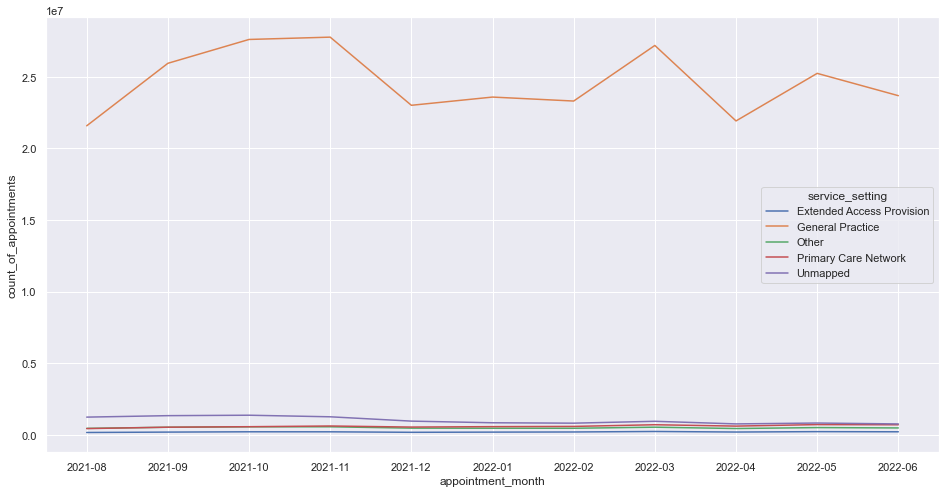

In [27]:
#What is the date range of the provided data sets, and which service settings reported the most appointments for a specific period?
#use min and max in every dataframe to obtain date range
print(df_national_categories['appointment_date'].max())
print(df_national_categories['appointment_date'].min())


print(df_regional['appointment_month'].max())
print(df_regional['appointment_month'].min())

print(df_duration['appointment_date'].max())
print(df_duration['appointment_date'].min())

df_grouped = df_national_categories.groupby(['service_setting','appointment_month']).count_of_appointments.sum()
df_aux = df_grouped.to_frame()

plt.figure(figsize=(16,8)) # this creates a figure 16 inch wide, 8 inch high

sns.lineplot(data=df_aux, x="appointment_month", y="count_of_appointments",ci=None,hue="service_setting")




In [28]:
#What is the number of appointments and records per month?

df_grouped = df_regional.groupby(['appointment_month']).count_of_appointments.sum()
df_aux = df_grouped.to_frame()
df_aux.head(100)
#df_aux.head(12)



,count_of_appointments
appointment_month,
2020-01,27199296
2020-02,24104621
2020-03,24053468
2020-04,16007881
2020-05,16417212
2020-06,20690805
2020-07,22491437
2020-08,20150520
2020-09,26714255


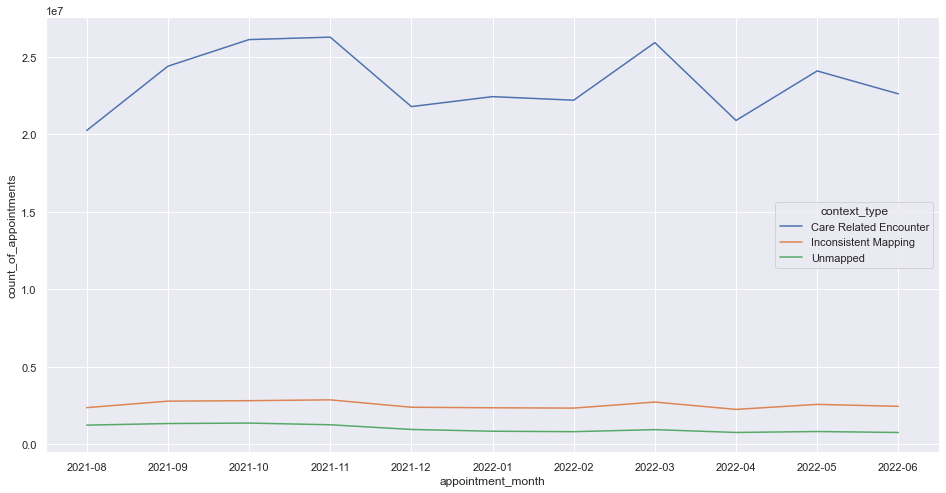

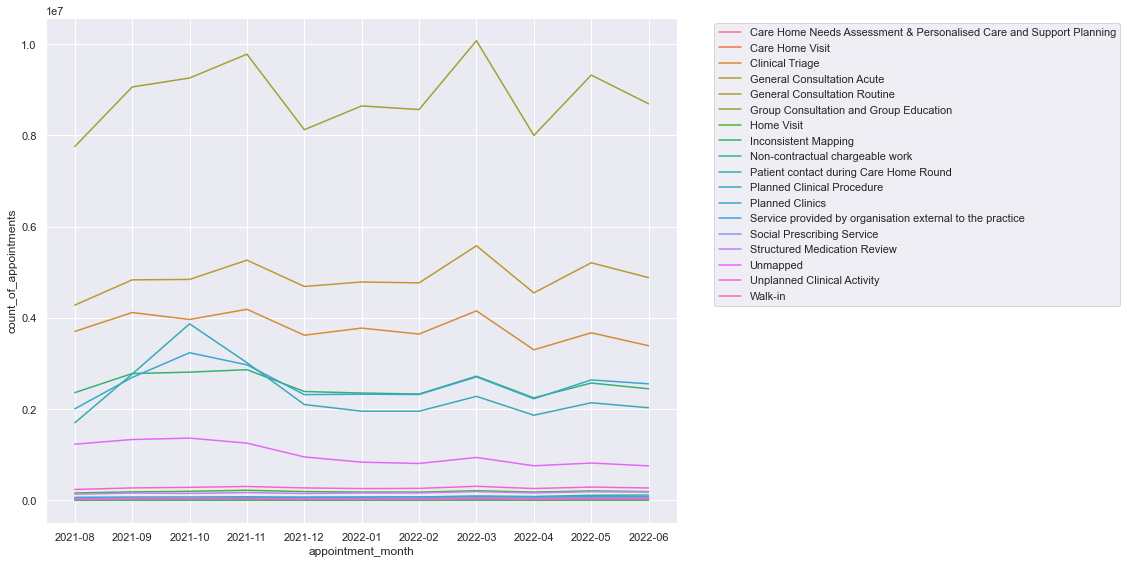

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

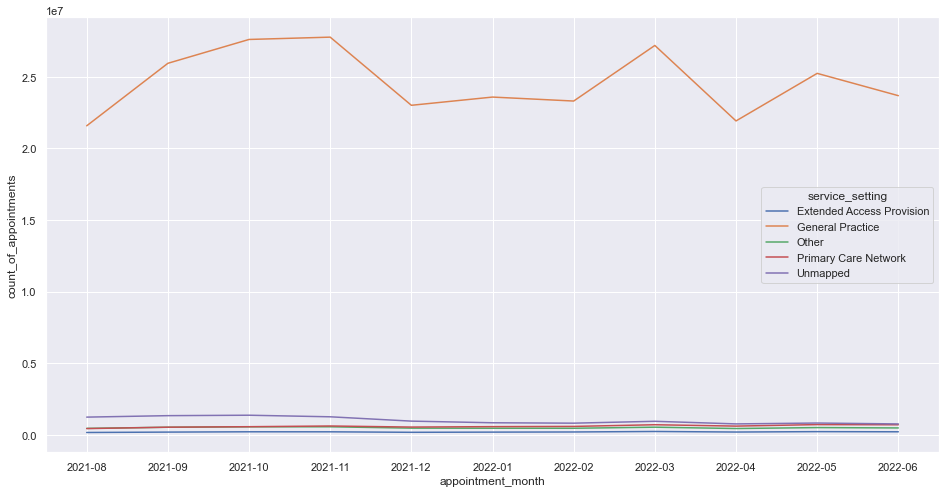

In [29]:
#What monthly and seasonal trends are evident, based on the number of appointments for service settings, context types, and national categories?

#context types
df_grouped = df_national_categories.groupby(['context_type','appointment_month']).count_of_appointments.sum()
df_aux = df_grouped.to_frame()

plt.figure(figsize=(16,8)) # this creates a figure 16 inch wide, 8 inch high

sns.lineplot(data=df_aux, x="appointment_month", y="count_of_appointments",ci=None,hue="context_type")

#National categories

df_grouped = df_national_categories.groupby(['national_category','appointment_month']).count_of_appointments.sum()
df_aux = df_grouped.to_frame()

plt.figure(figsize=(16,8)) # this creates a figure 16 inch wide, 8 inch high

sns.lineplot(data=df_aux, x="appointment_month", y="count_of_appointments",ci=None,hue="national_category")

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

#service settings

df_grouped = df_national_categories.groupby(['service_setting','appointment_month']).count_of_appointments.sum()
df_aux = df_grouped.to_frame()

plt.figure(figsize=(16,8)) # this creates a figure 16 inch wide, 8 inch high

sns.lineplot(data=df_aux, x="appointment_month", y="count_of_appointments",ci=None,hue="service_setting")

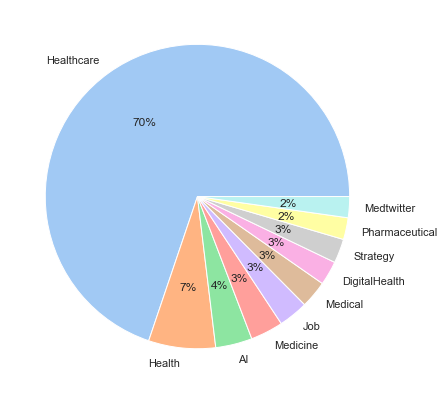

In [30]:
#What are the top trending hashtags (#) on Twitter related to healthcare in the UK?

#First we concatenate all the hashtags values in a string
#First we transform the values of "tweet_entities_hashtags" to strings with df_tweets["tweet_entities_hashtags"].astype(str)
#Then we transform the sub-dataframe to a list, an array with df_tweets["tweet_entities_hashtags"].astype(str).to_list()
#then with join, we concatenate all elements in the list with ',' with ",".join()


list_hashtags = df_tweets["tweet_entities_hashtags"].astype(str).to_list()

list_hashtags = [str(x).lower() for x in list_hashtags if str(x) != 'nan']

string = ",".join(list_hashtags)


#Now we have a string with hashtags separated by spaces and commas 
#first we remove spaces with replace

string = string.replace(" ","")

#The we hace the hashtags separated by commas
#we use split() to obtain a list of all hashtags
list_aux = string.split(',')

#print(list_aux)
#we create a dataframe using the list of all tags, so we can operate over tags easily
#We name the column as "hashtag"
df_hashtags = pd.DataFrame(list_aux, columns=["hash"])

#with value_counts we obtains the number of ocurrences of every hashtag
hashtags_counts=df_hashtags.hash.value_counts()

#And we add frequencies to first dataframe

hashtags_counts.head(10)


#define data

plt.figure(figsize = (10, 7))

data = [844, 86, 47, 42, 38, 35, 31, 31, 28, 27]
labels = ['Healthcare', 'Health', 'AI', 'Medicine', 'Job', 'Medical', 'DigitalHealth', 'Strategy', 'Pharmaceutical', 'Medtwitter']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:10]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

plt.show()

#WHYTHISOPTIONDIDN'T WORK: 
#df1=df_tweets['tweet_entities_hashtags'].value_counts()

#df1.head(20)


#df_tweets.groupby(['tweet_entities_hashtags']).tweet_id.sum()

#df_aux = df_grouped.to_frame()
#df_aux.head()
#df_aux.head(12)


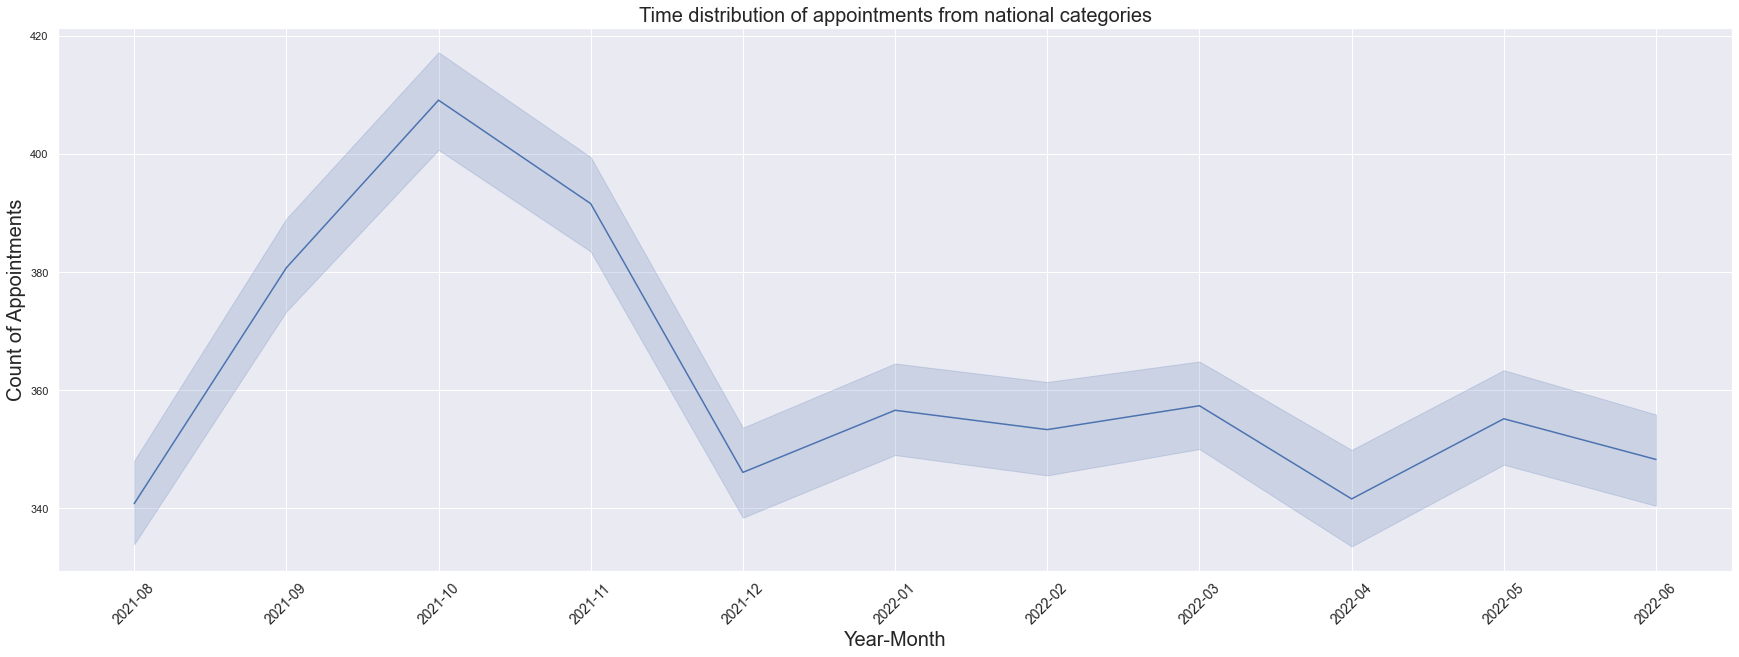

In [31]:
#Were there adequate staff and capacity in the networks?
#df_regional.groupby(['icb_ons_code']).time_between_book_and_appointment.freq()
#df_regional.groupby(['icb_ons_code']).time_between_book_and_appointment.value_counts()

sns.set()
plt.figure(figsize = (30,10))
#we make some initial graphs to explore the datasets
ax = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',data = df_national_categories)
plt.xticks(rotation=45,fontsize=14)
ax.set_xlabel("Year-Month", fontsize = 20)
ax.set_ylabel("Count of Appointments", fontsize = 20)
ax.set_title("Time distribution of appointments from national categories", fontsize = 20)
plt.show() 

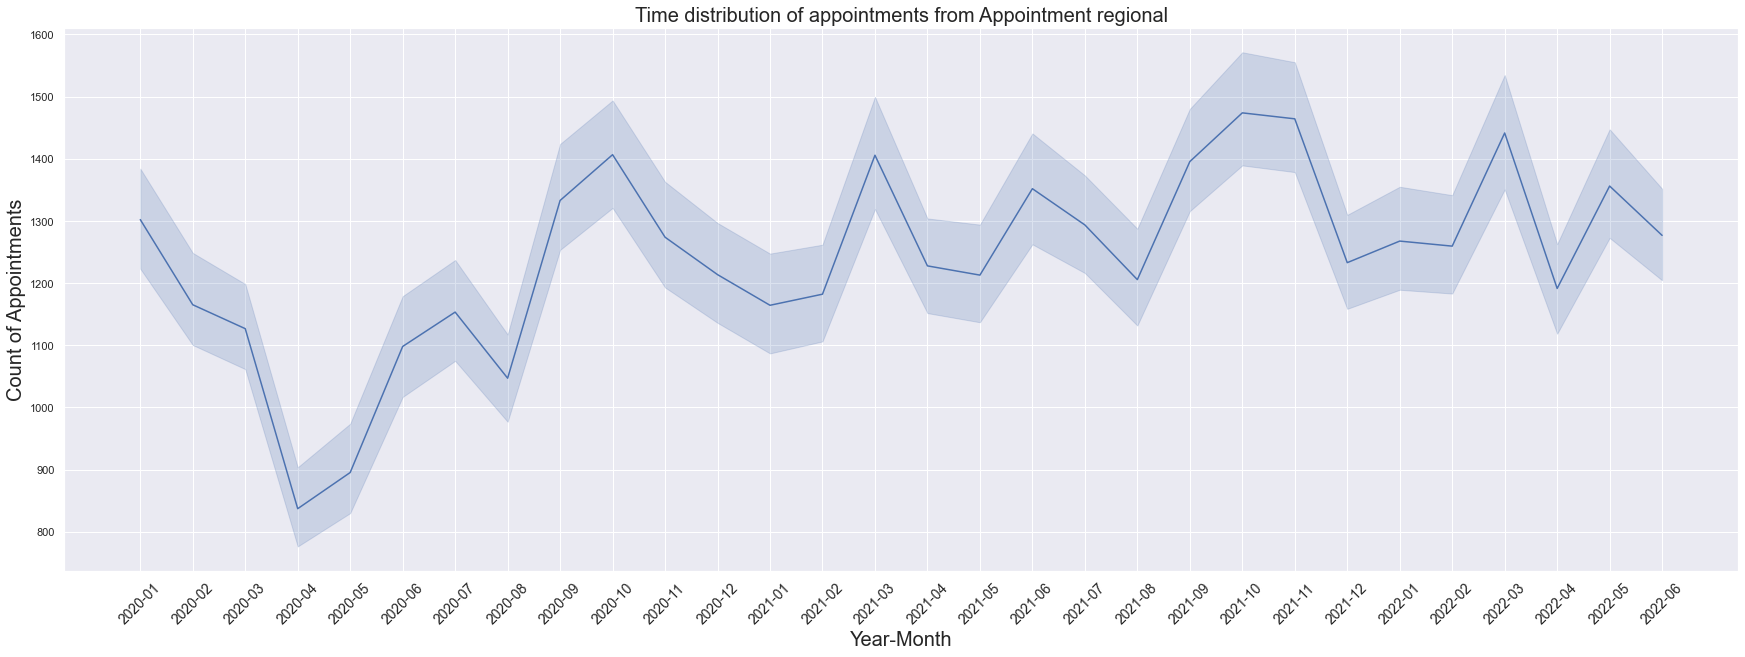

In [32]:
sns.set()
plt.figure(figsize = (30,10))

ax = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',data = df_regional)

plt.xticks(rotation=45,fontsize=14)
ax.set_xlabel("Year-Month", fontsize = 20)
ax.set_ylabel("Count of Appointments", fontsize = 20)
ax.set_title("Time distribution of appointments from Appointment regional", fontsize = 20)

plt.show() 



#What was the actual utilisation of resources?
#services,locations,...
#week6

With "Appointment Regional" file, since it is the file with longest data range, we can see some temporal patterns.

First of all, we can see the Covid lockdown between March 2020-June 2020. Even the count of appointments is lower tan usual until October 2020.

If we compare consecutive years month by month, we also can see another patterns. The number of appointments goes up from January to March (maybe flu or other respiratory illness?). Then it decreases to a mininum in April, and it rises again in May-June. The maximum is reached in october, and then it decreases again in December (end of the flu, or is it due to Christmas holidays?)

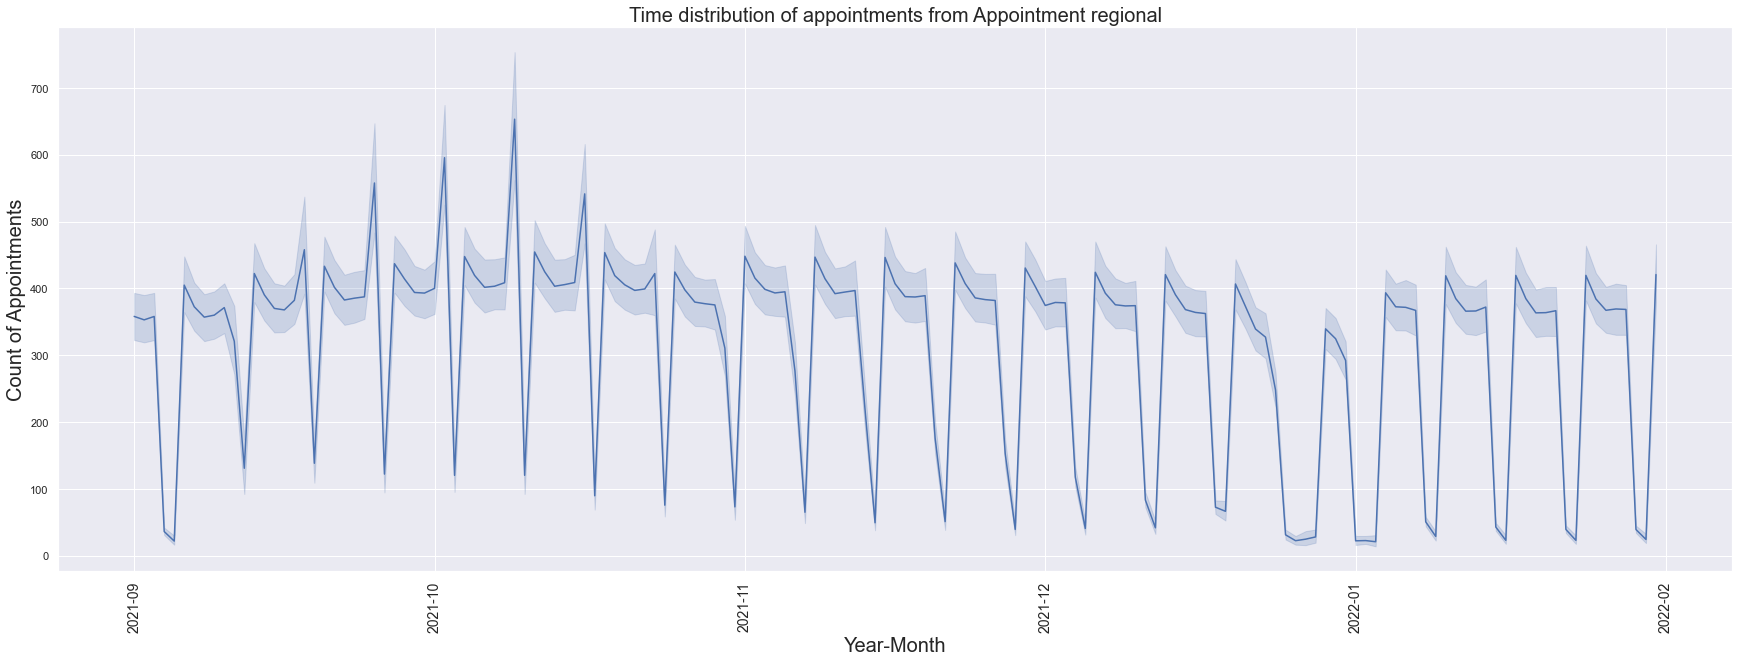

In [33]:
#we make som initial graphs to explore the datasets
sns.set()
plt.figure(figsize = (30,10))

#we get only some months from national categories to analyze day patters
#we use df.loc to get only some rows of original dataframe using logic operators
df_aux = df_national_categories.loc[(df_national_categories['appointment_month']=="2021-09") |
                                    (df_national_categories['appointment_month']=="2021-10") |
                                    (df_national_categories['appointment_month']=="2021-11") |
                                    (df_national_categories['appointment_month']=="2021-12") |
                                    (df_national_categories['appointment_month']=="2022-01") ]


#now we plot using date not month
ax = sns.lineplot(x = 'appointment_date', y = 'count_of_appointments',data = df_aux)

plt.xticks(rotation=90,fontsize=14)
ax.set_xlabel("Year-Month", fontsize = 20)
ax.set_ylabel("Count of Appointments", fontsize = 20)
ax.set_title("Time distribution of appointments from Appointment regional", fontsize = 20)

plt.show() 


We can see a special repeating pattern. It is repeated peridiocally, except for September 2021 - October 2021.

This pattern is usually due to day of the weeks.

We can confirm it, if we go deep into some days

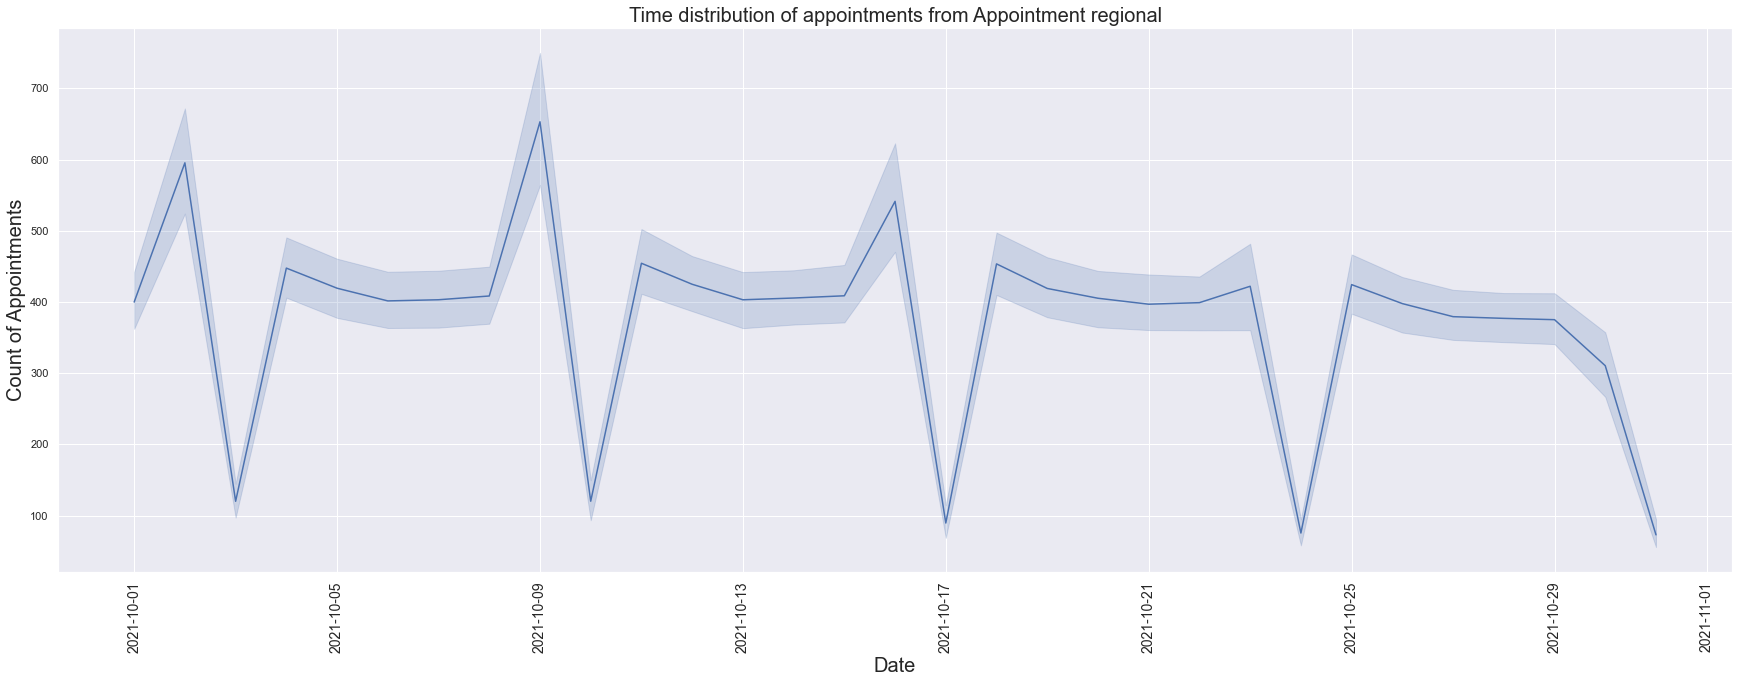

In [34]:
#we make some initial graphs to explore the datasets
sns.set()
plt.figure(figsize = (30,10))

df_aux = df_national_categories.loc[(df_national_categories['appointment_month']=="2021-10")]

df_aux
ax = sns.lineplot(x = 'appointment_date', y = 'count_of_appointments',data = df_aux)

plt.xticks(rotation=90,fontsize=14)
ax.set_xlabel("Date", fontsize = 20)
ax.set_ylabel("Count of Appointments", fontsize = 20)
ax.set_title("Time distribution of appointments from Appointment regional", fontsize = 20)

plt.show() 

Here we can confirm the weekly pattern. For example on 2021-10-25 to 2021-10-31 we can see a complete week. On Monday, the number of appointmes gets to a maximum and then goes down until Sunday.

This is the usual pattern, but we also can see that for some weeks, we can gent a maximun at the end of week (on Saturday). For example on Saturday 2021-10-09. This anormal pattern is repeated in September 2021 - October 2021, as we showed in the previous plot with a longer date range.

Quality of Health Service

To know some indicators for quality of the Health service, we can see the gap between the book date and the appointment date. If we see that this gap is big for most of appointments, there could be problem

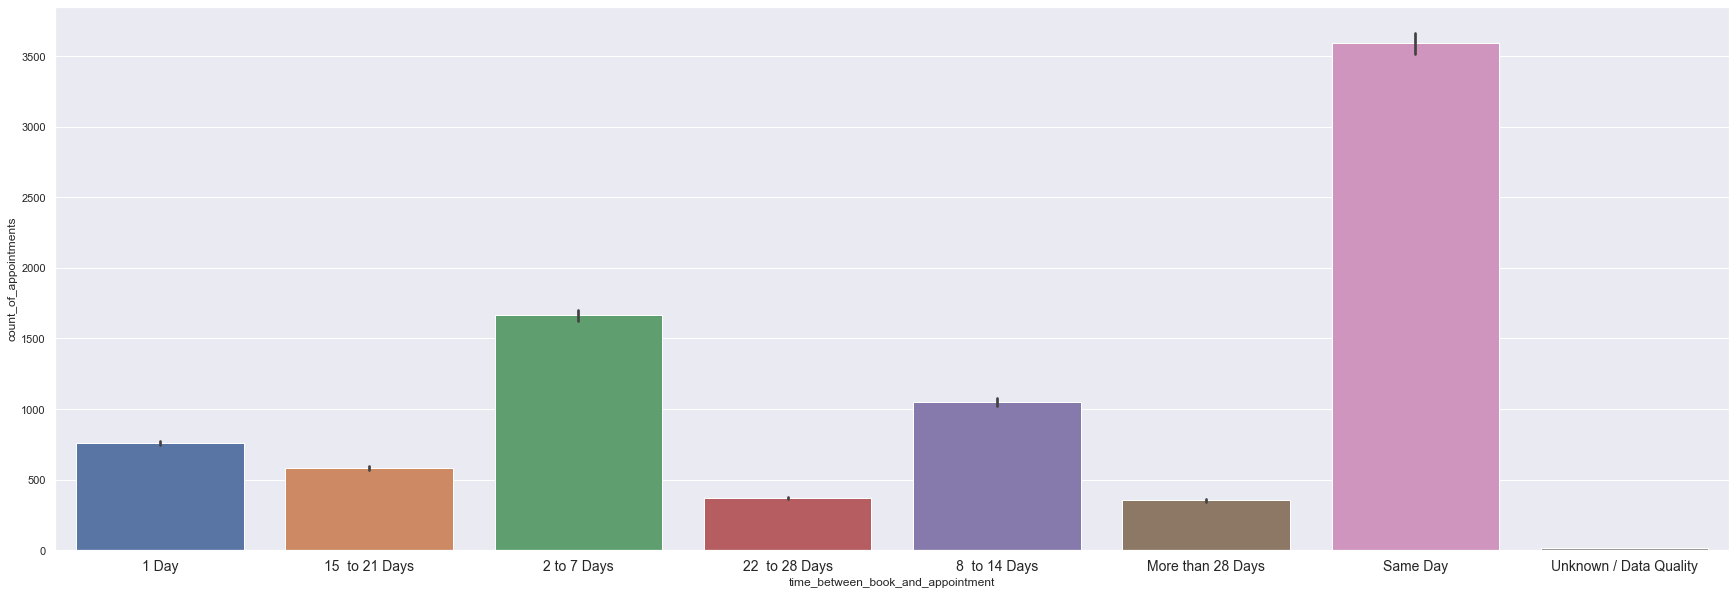

In [36]:
plt.figure(figsize = (30,10))

#prepare a bar plot to show number of appointments depending on time between ook and appointment
sns.barplot(x="time_between_book_and_appointment", y="count_of_appointments", data=df_regional,
           hue_order=['Same Day', '1 Day', '2 o 7 Days','8 to 14 days', '15 to 21 days', '22 to 28 Days',
                     'More than 28 Days', 'Unknown/Data Quality'])

#we configure some element
plt.xticks(fontsize=14)
ax.set_xlabel("time between book and appointment", fontsize = 20)
ax.set_ylabel("Count of Appointments", fontsize = 20)
ax.set_title("Number of appointments depending of time gap", fontsize = 20)

plt.show() 

It seems there is not a real problem. The most frecuent is Same Day and the second is 2-7 days. But we do not exactly the quality indicators for this measure

Now we try to find some indicators regarding duration of the appointment. Some quality standards set that the minimum time should be around 15 minutes.

Lets see if we can get some indicators about that. We will make the analysis using ICB location too

We will drop data with no information of duration.

We will calculate the number of appointments for every duration for every ICB location.We will also calculate the percentage over the total apppintmets in every location, to see if there are some critical locations

In [37]:
# Obtain the grouping by location and duration, with count and percentage
#we drop Unknow values to focus on defined values
df_aux = df_duration.drop(df_duration[df_duration['actual_duration'] == 'Unknown / Data Quality'].index)

#group to count toal appointments by region location an duration
#we calculate the total number of appointments
grouped = df_aux.groupby(by=['region_ons_code','sub_icb_location_name','actual_duration']).count_of_appointments.sum().rename('counts_appointment_duration_sum')
#transform groupby object in a dataframe
df_grouped=grouped.reset_index()



# We obtain total appoinments for every sub_icb_location_name
totals = df_aux.groupby(['region_ons_code','sub_icb_location_name']).count_of_appointments.sum().rename('counts_appointment_duration_total')
#transform groupby object in a dataframe
df_totals = totals.reset_index()

#Now we merge/join the two data frames to assign to every count of appointments for every duration and location
#the total number of occupations for every location
# Merge dataframes
df_joined = pd.merge(df_grouped, df_totals, on=['region_ons_code','sub_icb_location_name'])

# Now we can calculate the percentage of appointments of every duration respect total appointments
df_joined['percentage'] = df_joined['counts_appointment_duration_sum'] / df_joined['counts_appointment_duration_total'] * 100


#see the df_joind to understand the process
df_joined



,region_ons_code,sub_icb_location_name,actual_duration,counts_appointment_duration_sum,counts_appointment_duration_total,percentage
0,E40000003,NHS North Central London ICB - 93C,1-5 Minutes,479241,2401937,19.952272
1,E40000003,NHS North Central London ICB - 93C,11-15 Minutes,483885,2401937,20.145616
2,E40000003,NHS North Central London ICB - 93C,16-20 Minutes,331829,2401937,13.815058
3,E40000003,NHS North Central London ICB - 93C,21-30 Minutes,327070,2401937,13.616927
4,E40000003,NHS North Central London ICB - 93C,31-60 Minutes,225123,2401937,9.372561
...,...,...,...,...,...,...
631,E40000012,NHS West Yorkshire ICB - X2C4Y,11-15 Minutes,205961,1025859,20.076931
632,E40000012,NHS West Yorkshire ICB - X2C4Y,16-20 Minutes,123769,1025859,12.064913
633,E40000012,NHS West Yorkshire ICB - X2C4Y,21-30 Minutes,106592,1025859,10.390512
634,E40000012,NHS West Yorkshire ICB - X2C4Y,31-60 Minutes,58408,1025859,5.693570


We make a plot to see some patterns. First with number of appointments

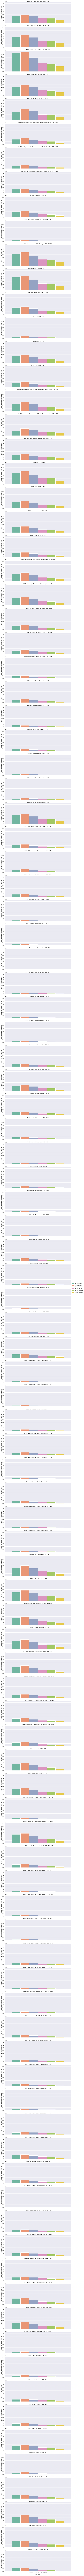

In [38]:
#we start showing number of appointmens of every duration for every location

#We create a FacetGrid object to show different similar graphs depending on location of ICB
# We define an order for color to be similar for all plots
g = sns.FacetGrid(data=df_joined, row='sub_icb_location_name', aspect=3, height=3,
                 hue_order=['1-5 Minutes', '6-10 Minutes', '11-15 Minutes','16-20 Minutes', '21-30 Minutes', '31-60 Minutes'])

# We define the barplot to show in every place of the grid
#g.map(sns.barplot, 'sub_icb_location_name', 'counts_appointment_duration_sum', 'actual_duration',hue='actual_duration',
#     hue_order=['0-5 Minutes', '6-10 Minutes', '11-15 Minutes','16-20 Minutes', '21-30 Minutes', '31-60 Minutes'], 
#     palette='Set2')

g.map_dataframe(sns.barplot, 'sub_icb_location_name', 'counts_appointment_duration_sum', 'actual_duration',hue='actual_duration',
     hue_order=['1-5 Minutes', '6-10 Minutes', '11-15 Minutes','16-20 Minutes', '21-30 Minutes', '31-60 Minutes'], 
     palette='Set2')


# COnfigure titles
g.set_axis_labels('Duration', 'Count of Appointments')
#To show every ICB location
g.set_titles(row_template='{row_name}')
g.add_legend()
plt.show()

We can see that the most frecuent is 6-10 minutes and 1-5 minutes. The number of appointments is not useful yo know if there is some deviations in a location, because some location can have more patients than others.

So we will use the percentage of appointments of every duration over the total number of appointments for a location.

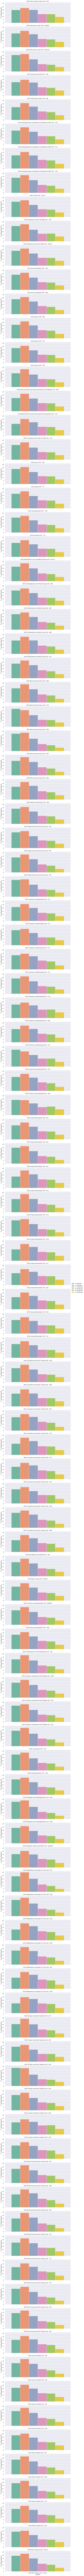

In [39]:
#we make the same with percentages
#We create a FacetGrid object to show different similar graphs depending on location of ICB
# We define an order for color to be similar for all plots
g = sns.FacetGrid(data=df_joined, row='sub_icb_location_name', aspect=3, height=3,
                 hue_order=['1-5 Minutes', '6-10 Minutes', '11-15 Minutes','16-20 Minutes', '21-30 Minutes', '31-60 Minutes'])

# We define the barplot to show in every place of the grid
#g.map(sns.barplot, 'sub_icb_location_name', 'counts_appointment_duration_sum', 'actual_duration',hue='actual_duration',
#     hue_order=['0-5 Minutes', '6-10 Minutes', '11-15 Minutes','16-20 Minutes', '21-30 Minutes', '31-60 Minutes'], 
#     palette='Set2')

g.map_dataframe(sns.barplot, 'sub_icb_location_name', 'percentage', 'actual_duration',hue='actual_duration',
     hue_order=['1-5 Minutes', '6-10 Minutes', '11-15 Minutes','16-20 Minutes', '21-30 Minutes', '31-60 Minutes'], 
     palette='Set2')


# COnfigure titles
g.set_axis_labels('Duration', '% of Appointments')
#To show every ICB location
g.set_titles(row_template='{row_name}')
g.add_legend()
plt.show()

We can see that 1-5 and 6-10 minutes have high values, so in some location the appointments around 1-10 minutes can be more than 50%, that is not a good indicator.

We will try to obtain the locations with more percentage for 1-10 minutes duration. We will calculate also the mean of percentage for all locations

In [40]:
#first we get only 1-5 and 6-10 minutes rows
df_joined_0_10 = df_joined[df_joined['actual_duration'].isin(['1-5 Minutes', '6-10 Minutes'])]

#then using group we add the two values
grouped = df_joined_0_10.groupby(by=['region_ons_code','sub_icb_location_name']).percentage.sum().rename('percentage_1_10_sum')

#transform to Dataframe
df_grouped = grouped.reset_index()

#we calculate the mean of percentage of 1-10 minutes appointments
mean_percentage = df_grouped['percentage_1_10_sum'].mean()

print("The mean of percentage of duration 1-10 is: ", mean_percentage)

#we get locations with percentage over mean
df_joined_mean = df_grouped[df_grouped['percentage_1_10_sum'] > mean_percentage]


#we sort the dataframe to get the locations with maximun percentage
df_joined_mean = df_joined_mean.sort_values(by=['percentage_1_10_sum'], ascending=False)

print("The number of locations with more percentage of 1-10 minutes appointments is: ", len(df_joined_mean))
df_joined_mean

The mean of percentage of duration 1-10 is:  48.69604219906763
The number of locations with more percentage of 1-10 minutes appointments is:  58


,region_ons_code,sub_icb_location_name,percentage_1_10_sum
85,E40000012,NHS Humber and North Yorkshire ICB - 03H,55.651267
74,E40000011,NHS Nottingham and Nottinghamshire ICB - 02Q,55.327341
30,E40000007,NHS Mid and South Essex ICB - 99E,55.325376
77,E40000011,NHS Staffordshire and Stoke-on-Trent ICB - 04Y,54.164696
29,E40000007,NHS Mid and South Essex ICB - 07G,53.576659
78,E40000011,NHS Staffordshire and Stoke-on-Trent ICB - 05D,53.316999
36,E40000007,NHS Suffolk and North East Essex ICB - 07K,52.825026
72,E40000011,NHS Lincolnshire ICB - 71E,52.482611
70,E40000011,NHS Leicester Leicestershire and Rutland ICB -...,52.443130
2,E40000003,NHS North West London ICB - W2U3Z,52.347065


Finally we can see that the mean of percentage of 1-10 minutes appointments is high (48%), and we have 58 locations over the mean